<a href="https://colab.research.google.com/github/atharvadesai1/IPD-Project/blob/main/stress_detection_redit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/merged.csv')
df.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1514980773,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62.0,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1493348050,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2.0,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1524516630,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8.0,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1524018289,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7.0,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1516200171,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70.0,4.801869,0.141667


# New Section

In [4]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,1096.000000,1096.000000,1096.000000,1.096000e+03,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,...,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,13671.445255,0.520985,0.746946,1.517616e+09,23.376825,4.709144,85.795620,35.960484,39.260830,69.403823,...,1.081386,1.120130,1.000365,1.724676,1.535287,1.876749,0.851516,9.478539,5.473897,0.039869
std,17576.456674,0.499787,0.286002,1.539815e+07,110.011736,3.194499,32.410864,26.560207,31.010856,32.160773,...,0.110369,0.088908,0.008544,0.048260,0.102821,0.057016,0.177819,16.452892,2.447887,0.193899
min,2.000000,0.000000,0.000000,1.483330e+09,0.000000,-4.800000,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.218180,1.561150,0.200000,0.000000,-2.318095,-1.000000
25%,890.750000,0.000000,0.600000,1.509573e+09,2.000000,2.589326,65.000000,13.015000,11.140000,46.282500,...,1.000000,1.000000,1.000000,1.693495,1.466380,1.839125,0.760000,2.000000,3.793476,-0.064419
50%,1819.000000,1.000000,0.800000,1.516722e+09,5.000000,4.420755,81.000000,31.440000,31.890000,83.385000,...,1.000000,1.142900,1.000000,1.724430,1.528440,1.875720,0.910000,5.000000,5.283519,0.043384
75%,25788.000000,1.000000,1.000000,1.530669e+09,10.000000,6.663586,101.000000,54.822500,65.035000,97.045000,...,1.125000,1.154800,1.000000,1.754800,1.597385,1.910500,1.000000,11.000000,6.989174,0.154167
max,55783.000000,1.000000,1.000000,1.542583e+09,1687.000000,22.535493,273.000000,99.000000,99.000000,99.000000,...,1.777800,1.777800,1.200000,1.946420,2.040000,2.140430,1.000000,318.000000,18.530103,0.800000


In [5]:
df.isnull()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1092,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1093,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1094,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

id                          0
subreddit                   0
post_id                     0
sentence_range              0
text                        0
                           ..
lex_dal_avg_pleasantness    1
social_upvote_ratio         1
social_num_comments         1
syntax_fk_grade             1
sentiment                   1
Length: 116, dtype: int64

In [7]:
df.columns

Index(['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [8]:
elements = df['subreddit'].value_counts()
elements

anxiety             226
relationships       211
ptsd                205
domesticviolence    125
assistance          103
survivorsofabuse     96
homeless             76
almosthomeless       26
stress               20
food_pantry           8
Name: subreddit, dtype: int64

# **Data Visualization**

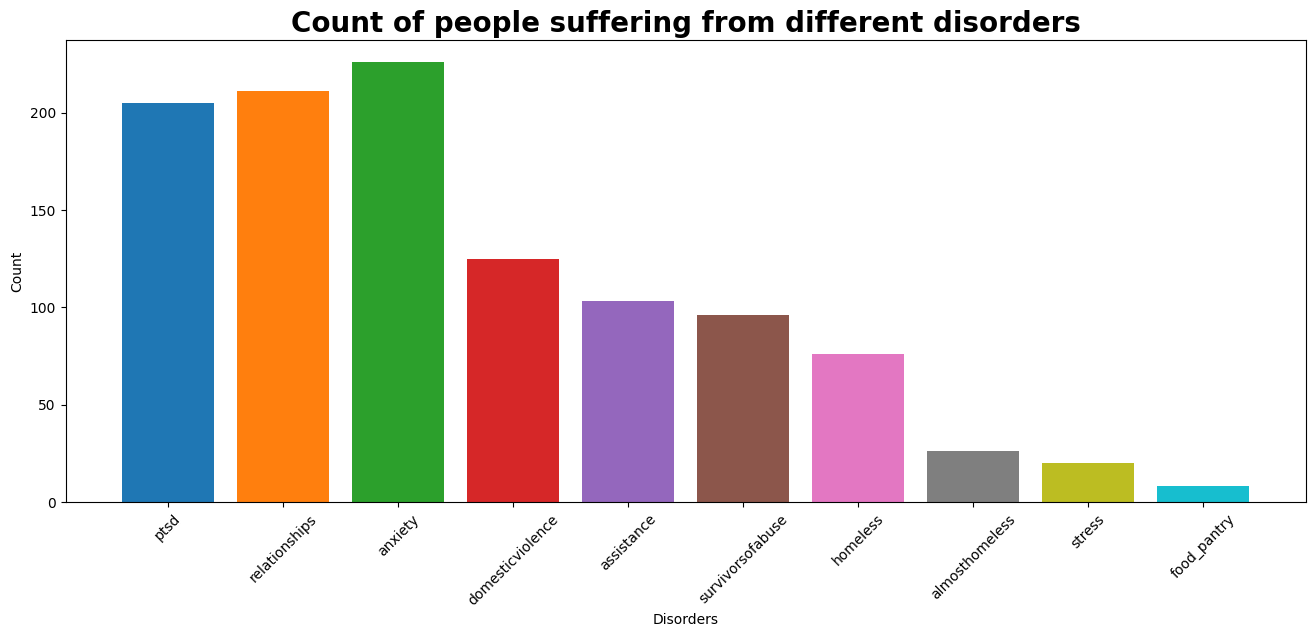

211

In [21]:

plt.figure(figsize=(16, 6))
relationships = df[(df['subreddit']=='relationships')]
ptsd = df[(df['subreddit']=='ptsd')]
anxiety = df[(df['subreddit']=='anxiety')]
domesticviolence = df[(df['subreddit']=='domesticviolence')]
survivorsofabuse = df[(df['subreddit']=='survivorsofabuse')]
homeless = df[(df['subreddit']=='homeless')]
assistance = df[(df['subreddit']=='assistance')]
food_pantry = df[(df['subreddit']=='food_pantry')]
stress = df[(df['subreddit']=='stress')]
almosthomeless = df[(df['subreddit']=='almosthomeless')]

categories = ['ptsd','relationships','anxiety','domesticviolence','assistance','survivorsofabuse','homeless','almosthomeless','stress','food_pantry']
count = [len(ptsd),len(relationships),len(anxiety),len(domesticviolence),len(assistance),len(survivorsofabuse),len(homeless),len(almosthomeless),len(stress),len(food_pantry)]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.xlabel('Disorders')
plt.ylabel('Count')
ax = plt.gca()
ax.set_title('Count of people suffering from different disorders',fontsize=20,fontweight='bold')
plt.bar(categories,count,color=colors)
plt.xticks(rotation=45)
plt.show()

len(relationships)

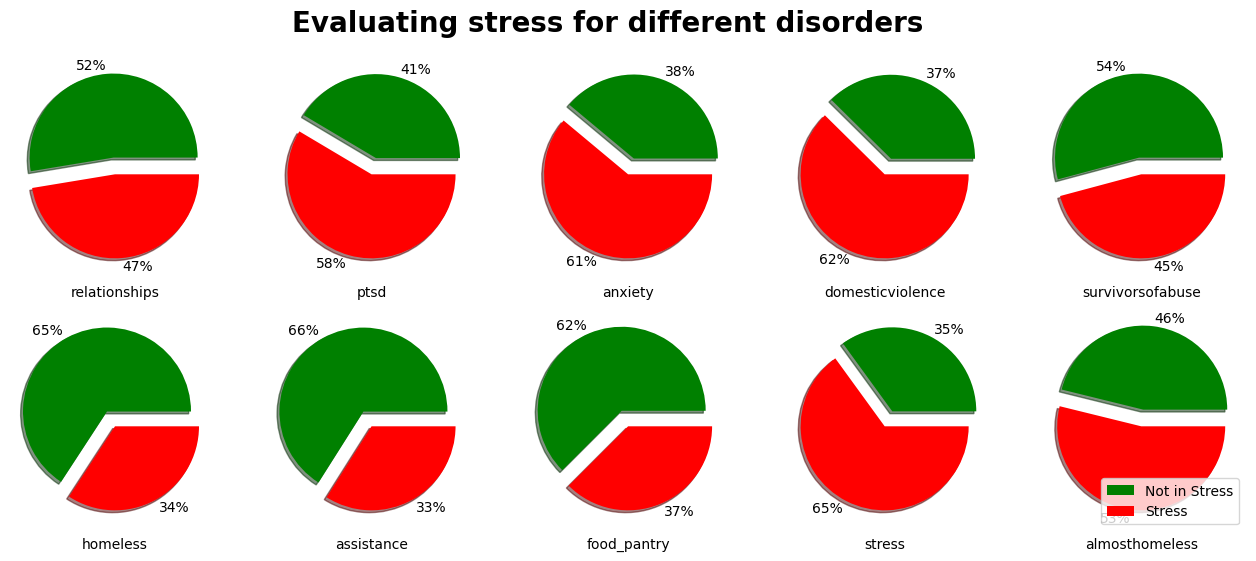

In [10]:
# sip = np.array([65,35])
mylabels = ["Not in Stress","Stress"]
myexplode = [0.2,0]
colors = ['green','red']

# plt.figure(figsize=(16, 6))
fig, axs = plt.subplots(2, 5, figsize=(16, 6))
fig.suptitle("Evaluating stress for different disorders",fontsize=20,fontweight='bold')

# plt.pie(sip,labels = mylabels, explode = myexplode, colors=colors, shadow =True)
# plt.show()
s_relationships = df[(df['subreddit']=='relationships') & (df['label']==1)]
ns_relationships = df[(df['subreddit']=='relationships') & (df['label']==0)]
percent_relationships = [(len(ns_relationships)/len(relationships))*100,(len(s_relationships)/len(relationships))*100]
lab = [str(int((len(ns_relationships)/len(relationships))*100))+'%' , str(int((len(s_relationships)/len(relationships))*100))+'%']
plt.subplot(2,5,1)
plt.xlabel("relationships")
plt.pie(percent_relationships,labels = lab, explode = myexplode, colors=colors,shadow =True)

s_ptsd = df[(df['subreddit']=='ptsd') & (df['label']==1)]
ns_ptsd = df[(df['subreddit']=='ptsd') & (df['label']==0)]
percent_ptsd = [(len(ns_ptsd)/len(ptsd))*100,(len(s_ptsd)/len(ptsd))*100]
lab = [str(int((len(ns_ptsd)/len(ptsd))*100))+'%' , str(int((len(s_ptsd)/len(ptsd))*100))+'%']
plt.subplot(2,5,2)
plt.xlabel("ptsd")
plt.pie(percent_ptsd,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_anxiety = df[(df['subreddit']=='anxiety') & (df['label']==1)]
ns_anxiety = df[(df['subreddit']=='anxiety') & (df['label']==0)]
percent_anxiety = [(len(ns_anxiety)/len(anxiety))*100,(len(s_anxiety)/len(anxiety))*100]
lab = [str(int((len(ns_anxiety)/len(anxiety))*100))+'%' , str(int((len(s_anxiety)/len(anxiety))*100))+'%']
plt.subplot(2,5,3)
plt.xlabel("anxiety")
plt.pie(percent_anxiety,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_domesticviolence = df[(df['subreddit']=='domesticviolence') & (df['label']==1)]
ns_domesticviolence = df[(df['subreddit']=='domesticviolence') & (df['label']==0)]
percent_domesticviolence = [(len(ns_domesticviolence)/len(domesticviolence))*100,(len(s_domesticviolence)/len(domesticviolence))*100]
lab = [str(int((len(ns_domesticviolence)/len(domesticviolence))*100))+'%' , str(int((len(s_domesticviolence)/len(domesticviolence))*100))+'%']
plt.subplot(2,5,4)
plt.xlabel("domesticviolence")
plt.pie(percent_domesticviolence,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_survivorsofabuse = df[(df['subreddit']=='survivorsofabuse') & (df['label']==1)]
ns_survivorsofabuse = df[(df['subreddit']=='survivorsofabuse') & (df['label']==0)]
percent_survivorsofabuse = [(len(ns_survivorsofabuse)/len(survivorsofabuse))*100,(len(s_survivorsofabuse)/len(survivorsofabuse))*100]
lab = [str(int((len(ns_survivorsofabuse)/len(survivorsofabuse))*100))+'%' , str(int((len(s_survivorsofabuse)/len(survivorsofabuse))*100))+'%']
plt.subplot(2,5,5)
plt.xlabel("survivorsofabuse")
plt.pie(percent_survivorsofabuse,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_homeless = df[(df['subreddit']=='homeless') & (df['label']==1)]
ns_homeless = df[(df['subreddit']=='homeless') & (df['label']==0)]
percent_homeless = [(len(ns_homeless)/len(homeless))*100,(len(s_homeless)/len(homeless))*100]
lab = [str(int((len(ns_homeless)/len(homeless))*100))+'%' , str(int((len(s_homeless)/len(homeless))*100))+'%']
plt.subplot(2,5,6)
plt.xlabel("homeless")
plt.pie(percent_homeless,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_assistance = df[(df['subreddit']=='assistance') & (df['label']==1)]
ns_assistance = df[(df['subreddit']=='assistance') & (df['label']==0)]
percent_assistance = [(len(ns_assistance)/len(assistance))*100,(len(s_assistance)/len(assistance))*100]
lab = [str(int((len(ns_assistance)/len(assistance))*100))+'%' , str(int((len(s_assistance)/len(assistance))*100))+'%']
plt.subplot(2,5,7)
plt.xlabel("assistance")
plt.pie(percent_assistance,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_food_pantry = df[(df['subreddit']=='food_pantry') & (df['label']==1)]
ns_food_pantry = df[(df['subreddit']=='food_pantry') & (df['label']==0)]
percent_food_pantry = [(len(ns_food_pantry)/len(food_pantry))*100,(len(s_food_pantry)/len(food_pantry))*100]
lab = [str(int((len(ns_food_pantry)/len(food_pantry))*100))+'%' , str(int((len(s_food_pantry)/len(food_pantry))*100))+'%']
plt.subplot(2,5,8)
plt.xlabel("food_pantry")
plt.pie(percent_food_pantry,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_stress = df[(df['subreddit']=='stress') & (df['label']==1)]
ns_stress = df[(df['subreddit']=='stress') & (df['label']==0)]
percent_stress = [(len(ns_stress)/len(stress))*100,(len(s_stress)/len(stress))*100]
lab = [str(int((len(ns_stress)/len(stress))*100))+'%' , str(int((len(s_stress)/len(stress))*100))+'%']
plt.subplot(2,5,9)
plt.xlabel("stress")
plt.pie(percent_stress,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_almosthomeless = df[(df['subreddit']=='almosthomeless') & (df['label']==1)]
ns_almosthomeless = df[(df['subreddit']=='almosthomeless') & (df['label']==0)]
percent_almosthomeless = [(len(ns_almosthomeless)/len(almosthomeless))*100,(len(s_almosthomeless)/len(almosthomeless))*100]
lab = [str(int((len(ns_almosthomeless)/len(almosthomeless))*100))+'%' , str(int((len(s_almosthomeless)/len(almosthomeless))*100))+'%']
plt.subplot(2,5,10)
plt.xlabel("almosthomeless")
plt.pie(percent_almosthomeless,labels = lab, explode = myexplode, colors=colors, shadow =True)

plt.legend(mylabels, loc='lower right')
plt.show()

Average Confidence of stressed person: 0.7773163205446584
Average Confidence of non-stressed person: 0.7139138321638094


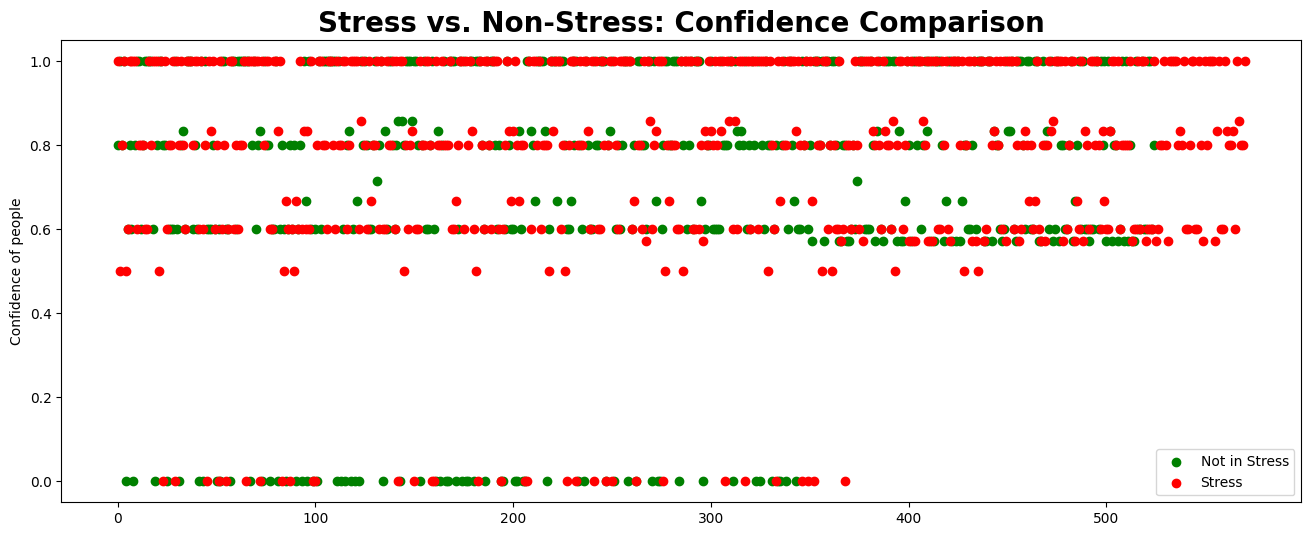

In [11]:
# checking confidence of stress and non-stress people form the dataset
plt.figure(figsize=(16, 6))
stressp = df[(df['label']==1)]
non_stressp = df[(df['label']==0)]

sc = np.array(stressp['confidence'])
nsc = np.array(non_stressp['confidence'])
print(f"Average Confidence of stressed person: {np.mean(sc)}")
print(f"Average Confidence of non-stressed person: {np.mean(nsc)}")

plt.scatter(range(len(non_stressp)), nsc,label='Not in Stress',color='green')
plt.scatter(range(len(stressp)), sc,label='Stress',color='red')
plt.ylabel('Confidence of people')
ax = plt.gca()
ax.set_title('Stress vs. Non-Stress: Confidence Comparison',fontsize=20,fontweight='bold')
plt.legend()
plt.show()

# Based on the Graph and Data, Stress Does Not Appear to Affect People's Confidence Levels

In [12]:
import datetime

print(f"Average Social time span of a stressed person: {datetime.datetime.fromtimestamp(np.mean(np.array(stressp['social_timestamp'])))}")
print(f"Average Social time span of a stressed person: {datetime.datetime.fromtimestamp(np.mean(np.array(non_stressp['social_timestamp'])))}")

Average Social time span of a stressed person: 2018-02-09 10:44:05.842382
Average Social time span of a stressed person: 2018-01-26 23:28:33.240000


In [13]:
import nltk
import re
from nltk.corpus import stopwords
import string

In [14]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]',' ',text)
    text = re.sub('https?://\S+/www\. \S+', ' ', text)
    text = re.sub('<. *?>+', ' ', text)
    text = re.sub(' [%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(' \n',' ', text)
    text = re.sub(' \w*\d\w*' ,' ', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text =" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ') ]
    text = " ".join(text)
    return text
df["text"] = df["text"].apply(clean)

In [16]:
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split

In [17]:
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split

x = np.array (df["text"])
y = np.array (df["label"])

cv = CountVectorizer ()
X = cv. fit_transform(x)
print(X)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.33)

  (0, 3164)	1
  (0, 5425)	2
  (0, 5900)	1
  (0, 3648)	1
  (0, 3329)	1
  (0, 4172)	1
  (0, 5334)	1
  (0, 3207)	1
  (0, 365)	2
  (0, 2199)	1
  (0, 2540)	2
  (0, 3134)	1
  (0, 5888)	1
  (0, 3739)	1
  (0, 2647)	2
  (0, 2498)	1
  (0, 4129)	1
  (0, 290)	1
  (0, 2139)	1
  (0, 2836)	1
  (0, 2648)	1
  (0, 5504)	1
  (1, 2540)	1
  (1, 3269)	1
  (1, 2209)	1
  :	:
  (1095, 3073)	1
  (1095, 3223)	1
  (1095, 5456)	1
  (1095, 1314)	1
  (1095, 656)	1
  (1095, 6059)	1
  (1095, 947)	1
  (1095, 6031)	1
  (1095, 949)	1
  (1095, 761)	1
  (1095, 6063)	1
  (1095, 5482)	1
  (1095, 1564)	1
  (1095, 4452)	1
  (1095, 3544)	1
  (1095, 1553)	1
  (1095, 2036)	1
  (1095, 1176)	2
  (1095, 636)	1
  (1095, 90)	1
  (1095, 902)	1
  (1095, 1639)	1
  (1095, 2081)	1
  (1095, 2692)	1
  (1095, 2712)	1


In [18]:
from sklearn.naive_bayes import BernoulliNB
f1=BernoulliNB()
f1.fit(xtrain,ytrain)

from sklearn.svm import SVC
f2 = SVC(kernel = 'rbf', random_state = 0)
f2.fit(xtrain, ytrain)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [19]:
'''user=input("Enter the text:")
data=cv.transform([user]).toarray()
output=model.predict(data)
if output==1:
  print("Yes,the person is in stress")
else:
  print("Not in stress")'''

'user=input("Enter the text:")\ndata=cv.transform([user]).toarray()\noutput=model.predict(data)\nif output==1:\n  print("Yes,the person is in stress")\nelse:\n  print("Not in stress")'



********Random Forest************
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       172
           1       0.69      0.72      0.71       190

    accuracy                           0.69       362
   macro avg       0.68      0.68      0.68       362
weighted avg       0.68      0.69      0.68       362



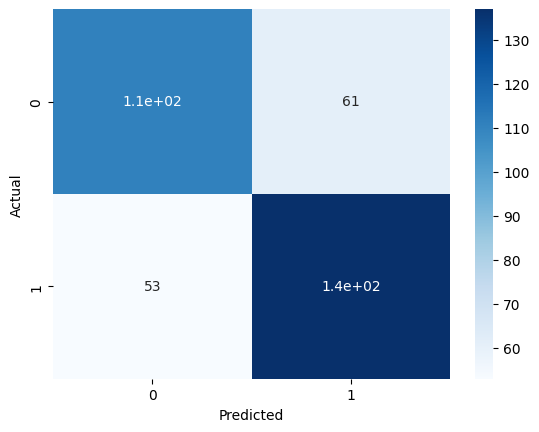



**********Naive Bayes**********
              precision    recall  f1-score   support

           0       0.73      0.58      0.65       172
           1       0.68      0.81      0.74       190

    accuracy                           0.70       362
   macro avg       0.70      0.69      0.69       362
weighted avg       0.70      0.70      0.69       362



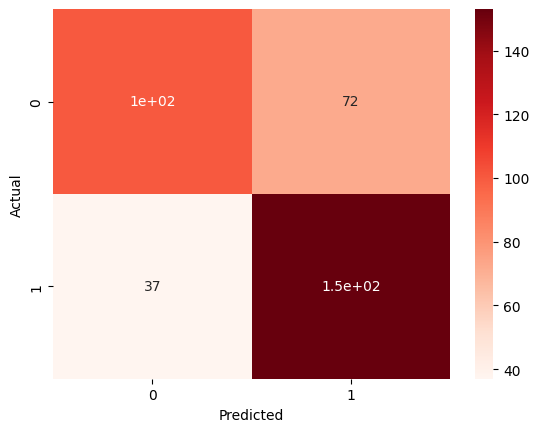



**********SVM**********
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       172
           1       0.69      0.69      0.69       190

    accuracy                           0.67       362
   macro avg       0.67      0.67      0.67       362
weighted avg       0.67      0.67      0.67       362



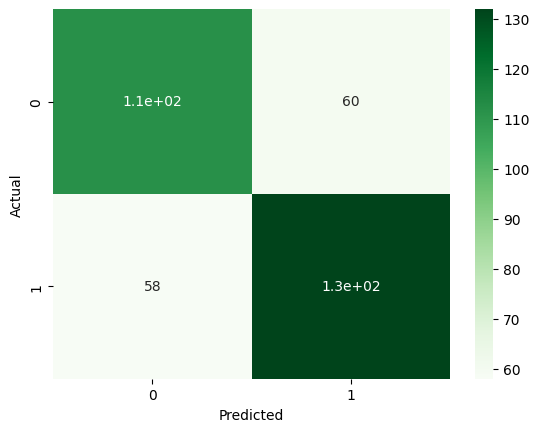

In [20]:
ypred = model.predict(xtest)
from sklearn.metrics import confusion_matrix,classification_report
cm1 = confusion_matrix(ytest,ypred)
print("\n\n********Random Forest************")
# print(cm1)
print(classification_report(ytest,ypred))

sns.heatmap(cm1,cmap="Blues",annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ypred = f1.predict(xtest)
from sklearn.metrics import confusion_matrix,classification_report
cm2 = confusion_matrix(ytest,ypred)
print("\n\n**********Naive Bayes**********")
# print(cm2)
print(classification_report(ytest,ypred))

sns.heatmap(cm2,cmap="Reds",annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ypred = f2.predict(xtest)
from sklearn.metrics import confusion_matrix,classification_report
cm3 = confusion_matrix(ytest,ypred)
print("\n\n**********SVM**********")
# print(cm3)
print(classification_report(ytest,ypred))

sns.heatmap(cm3,cmap="Greens",annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()